https://proplot.readthedocs.io/en/latest/1dplots.html#Shading-and-error-bars

conda env: proplot_v0.6.4

In [22]:
means.index.values

array([ 0,  2,  4,  6,  8, 10, 12, 14])

In [24]:
shadedata[0]

array([52.3207341 , 46.48562788, 35.23234265, 35.05252334, 43.59918346,
       29.83966198, 32.6969922 , 15.20116876])

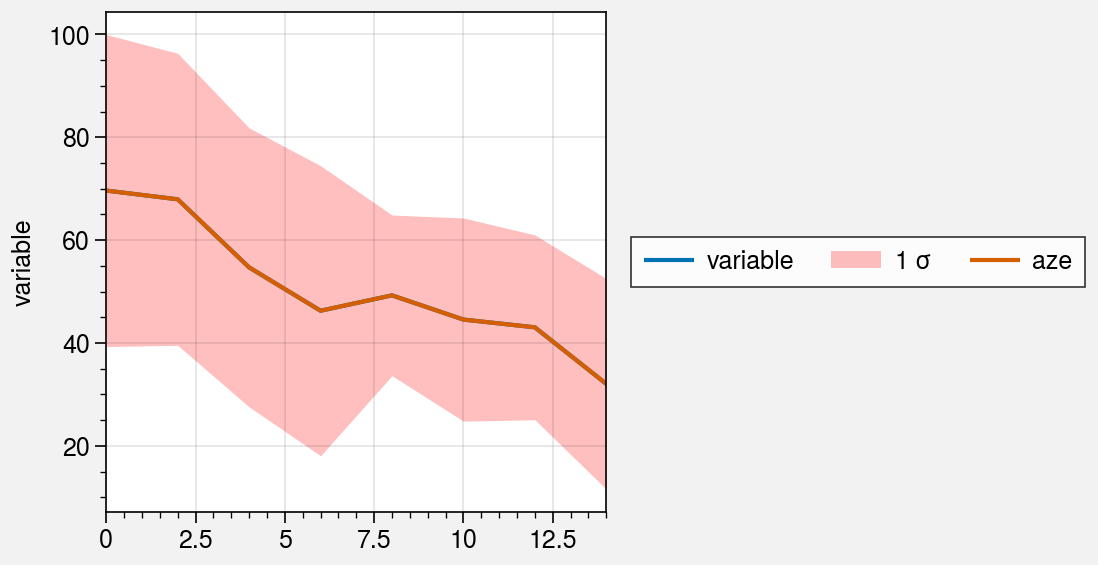

In [33]:
import proplot as plot
import numpy as np
import pandas as pd

# Generate sample data
state = np.random.RandomState(51423)
data = state.rand(20, 8).cumsum(axis=0).cumsum(axis=1)[:, ::-1]
data = data + 20 * state.normal(size=(20, 8)) + 30
data = pd.DataFrame(data, columns=np.arange(0, 16, 2))
data.name = 'variable'

# Generate figure
fig, axs = plot.subplots(nrows=1)

# Manually supply error bar data and legend labels
ax = axs[0]
means = data.mean(axis=0)
means.name = data.name
shadedata = np.percentile(data, (25, 75), axis=0)  # dark shading
fadedata = np.percentile(data, (5, 95), axis=0)  # light shading

h1 = ax.plot(
    means,
#     shadedata=shadedata, fadedata=fadedata,
#     shadelabel='50% CI', fadelabel='90% CI',
#     color='ocean blue', barzorder=0, boxmarker=False, legend='ll',
)

std = data.std(axis=0)

h2 = ax.fill_between(
    means.index.values, means-std, means+std,
    alpha=0.25, label='1 $\sigma$', color='red'
)

h3 = ax.plot(means, label='aze')

hs = [h1, h2, h3]


fig.legend(hs)